In [1]:
import gym
import numpy as np
import time

In [2]:
env = gym.make("FrozenLake-v1", new_step_api=True)
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 3000
MAX_STEPS = 100

LEARNING_RATE = 0.81
DISCOUNT_FACTOR = 0.96

RENDER = False

epsilon = 0.9 # 처음엔 90%로 높게 잡고 나중으로 가면 갈수록 낮게 함

In [3]:
#설명
if np.random.uniform(0,1) < epsilon: # 0,1 사이에서 랜덤 값 < epsilon
    action = env.action_space.sample() # 랜덤으로 action을 고름
else:
    action = np.argmax(Q[state, :]) # 제일 높은 reward를 가진 action을 고름, : = Q[state]안에 모든 값

# reward 공식
Q[state, action] = Q[state, action] + LEARNING_RATE * (new_state_reward + DISCOUNT_FACTOR * np.max(Q[new_state, :]) - Q[state, action])


NameError: name 'state' is not defined

In [ ]:
rewards = [] # agent가 죽었을때 = 0 살았을때 = 1
for episode in range(EPISODES):

    state = env.reset()
    for _ in range(MAX_STEPS):

        if RENDER:
            env.render()
        
        if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
        
        next_state, reward, done, _, _ = env.step(action)

        Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + DISCOUNT_FACTOR * np.max(Q[next_state, :]) - Q[state, action])

        state = next_state

        if done:
            rewards.append(reward)
            epsilon-=0.001
            break #죽거나 꺰
print(Q)
print(sum(rewards)/len(rewards))

[[2.27904854e-01 2.46426161e-02 2.29786882e-02 2.53178034e-02]
 [2.83014098e-03 7.71196612e-03 8.05358200e-03 1.23836940e-01]
 [8.79573223e-03 5.79909542e-03 4.60587963e-03 8.87436442e-02]
 [2.81368959e-03 2.09188634e-03 2.03269412e-03 9.06268408e-02]
 [3.14416044e-01 4.99749337e-03 1.06336310e-02 6.46220381e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.75425441e-05 2.07949008e-05 1.46799101e-01 3.69812108e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.07080802e-03 1.38028550e-02 5.14783244e-03 5.76679333e-01]
 [8.94288333e-03 8.73786251e-01 5.56372066e-03 6.55659527e-03]
 [1.78461040e-01 6.34979369e-04 1.16928979e-03 4.22346835e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.75950745e-02 3.74161482e-02 7.48731161e-01 3.85074666e-02]
 [2.14861209e-01 8.18912975e-01 7.46944252e-02 1.14582247e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

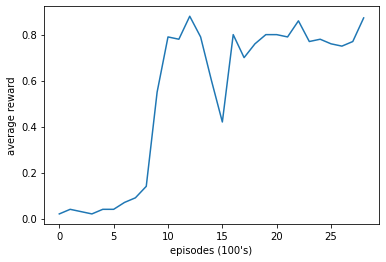

In [ ]:
import matplotlib.pyplot as plt

def get_average(values):
    return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
    avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()

In [4]:
for episode in range(10):

    state = env.reset()
    for _ in range(MAX_STEPS):

        env.render()
        time.sleep(0.3)
        
        if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
        
        next_state, reward, done, _, _ = env.step(action)

        state = next_state

        if done:
            if reward:
                print("yay!")
            break #죽거나 꺰
env.close()

/usr/local/lib/python3.9/site-packages/gym/core.py:57: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


: 